In [17]:
#Task 1.4 is not done, I want to use my stars for that Task. I have 3 Stars.

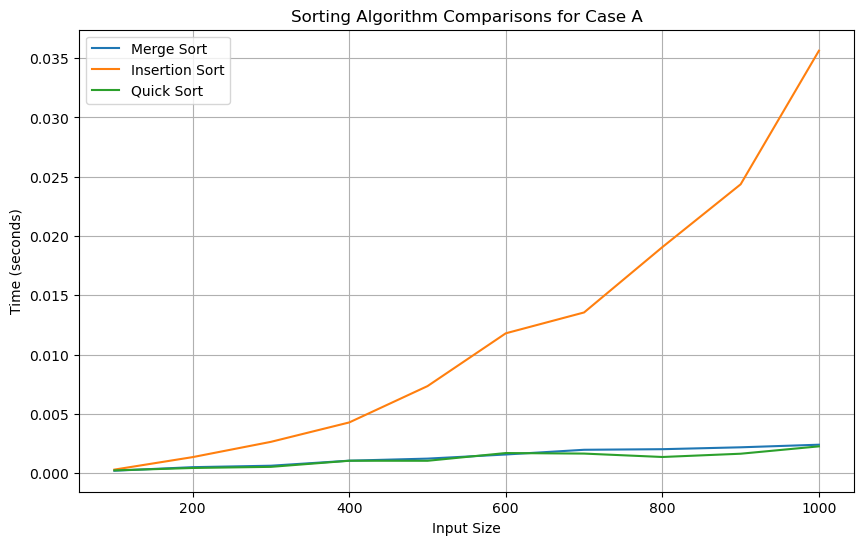

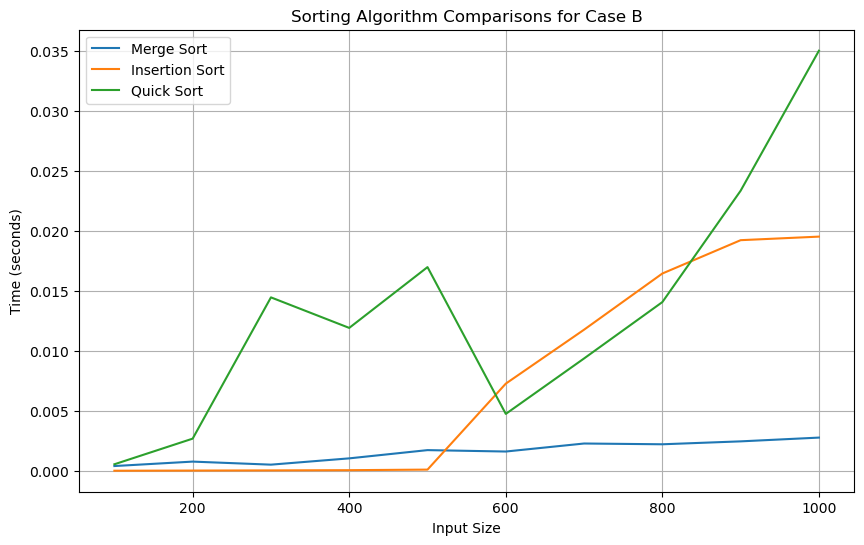

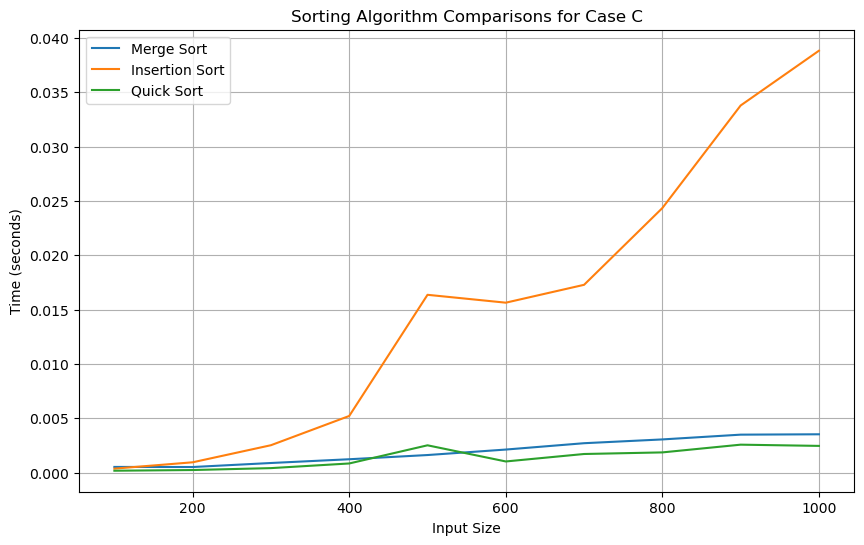

In [18]:
# Task 1.1: Sorting Algorithm Performance Analysis

import time  # Used to measure execution time of sorting algorithms
import matplotlib.pyplot as plt  # Used for plotting the results
import os  # Provides functions for interacting with the operating system
from pathlib import Path  # Simplifies working with file and directory paths

# Sorting Algorithms

# Merge Sort: A divide-and-conquer algorithm that recursively divides the array into halves,
# sorts each half, and then merges them back together.
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2  # Find the midpoint
        left_half = arr[:mid]  # Split the array into left half
        right_half = arr[mid:]  # Split the array into right half

        merge_sort(left_half)  # Recursively sort the left half
        merge_sort(right_half)  # Recursively sort the right half

        # Merge the sorted halves
        i = j = k = 0
        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        # Add any remaining elements from the left half
        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        # Add any remaining elements from the right half
        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1

# Insertion Sort: A simple sorting algorithm that builds the sorted array one element at a time.
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]  # The current element to insert
        j = i - 1
        # Shift elements of the sorted portion to the right until the correct position for `key` is found
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key  # Insert `key` into its correct position

# Quick Sort: An efficient, in-place sorting algorithm using a stack for iterative partitioning.
def quicksort(arr):
    stack = []  # Use a stack to keep track of subarrays to sort
    stack.append((0, len(arr) - 1))  # Start with the full array

    while stack:
        low, high = stack.pop()
        if low < high:
            pivot_index = partition(arr, low, high)  # Partition the array
            stack.append((low, pivot_index - 1))  # Add the left subarray to the stack
            stack.append((pivot_index + 1, high))  # Add the right subarray to the stack

# Partition function used in Quick Sort to rearrange elements around the pivot.
def partition(arr, low, high):
    pivot = arr[high]  # Choose the last element as the pivot
    i = low - 1  # Pointer for the smaller element
    for j in range(low, high):
        if arr[j] <= pivot:  # If the current element is smaller than or equal to the pivot
            i += 1
            arr[i], arr[j] = arr[j], arr[i]  # Swap the elements
    arr[i + 1], arr[high] = arr[high], arr[i + 1]  # Place the pivot in the correct position
    return i + 1  # Return the index of the pivot

# File Reading and Data Preprocessing

# Reads a text file and converts its content into a list of integers.
def read_file(file_path):
    with open(file_path, 'r') as f:
        sanitized_data = []
        for line in f:
            parts = line.strip().split()  # Split each line into parts
            for part in parts:
                part = part.strip("[],'")  # Remove unwanted characters
                if part.isdigit():  # Ensure the part is a digit
                    sanitized_data.append(int(part))  # Convert to integer and add to the list
    return sanitized_data

# Measures the time taken to sort an array using the specified sorting function.
def measure_time_sorting(arr, sort_fn):
    start_time = time.time()  # Record the start time
    sort_fn(arr)  # Execute the sorting function
    return time.time() - start_time  # Return the elapsed time

# Plotting Results

# Plots the timing results for sorting algorithms.
def plot_results(results, title):
    plt.figure(figsize=(10, 6))  # Set the figure size
    for label, timings in results.items():
        plt.plot(timings['sizes'], timings['times'], label=label)  # Plot each algorithm's results
    plt.title(title)  # Add a title to the plot
    plt.xlabel('Input Size')  # Label the x-axis
    plt.ylabel('Time (seconds)')  # Label the y-axis
    plt.legend()  # Show a legend
    plt.grid()  # Add a grid for better readability
    plt.show()  # Display the plot

# Main Code for Task 1.1

# Define the files to process and their paths
files = {'a': "1a_shuffled.txt", 'b': "1b_slight_shuffled.txt", 'c': "1c_shuffled_nogaps.txt"}
base_path = Path("/Users/alaasalem/Downloads/UALFINALS/Alaa/part_1.1")

# Define the sorting algorithms to test
sort_functions = {
    "Merge Sort": merge_sort,
    "Insertion Sort": insertion_sort,
    "Quick Sort": quicksort
}

# Loop through each test case and analyze sorting performance
for case, file_name in files.items():
    file_path = base_path / file_name  # Build the full file path
    arr = read_file(file_path)  # Read and preprocess the file

    results = {label: {'sizes': [], 'times': []} for label in sort_functions}  # Initialize results

    # Test sorting algorithms with different input sizes
    for size in range(100, 1001, 100):  # Input sizes from 100 to 1000
        sub_arr = arr[:size]  # Get a subset of the array
        for label, sort_fn in sort_functions.items():
            sub_arr_copy = sub_arr.copy()  # Copy the array to avoid in-place modification
            time_taken = measure_time_sorting(sub_arr_copy, sort_fn)  # Measure sorting time
            results[label]['sizes'].append(size)  # Record the input size
            results[label]['times'].append(time_taken)  # Record the time taken

    # Plot the results for the current test case
    plot_results(results, f"Sorting Algorithm Comparisons for Case {case.upper()}")


In [19]:
#Task 1.4 is not done, I want to use my stars for that Task I have 3 Stars.

In [20]:
# Task 1.2 - Alternative Sorting Algorithm

# For case C, where the array contains numbers from 1 to n without gaps,
# we can utilize a highly efficient algorithm that outperforms the previously 
# mentioned sorting algorithms. This algorithm sorts the array in a single pass.

# The algorithm works by directly placing each number in its correct position
# based on its value, eliminating the need for comparisons.

#def optimized_sequence_sort(arr):
 #   n = len(arr)  # Determine the size of the array
  #  result = [0] * n  # Create a new array of the same size initialized with 0
   # for i in range(n):
    #    result[arr[i] - 1] = arr[i]  # Place each number at its correct index

# Unlike traditional sorting algorithms, which compare elements to determine
# their order, this method processes each number exactly once and places it
# in its final position. There are no additional passes through the data,
# making it both simple and highly efficient for this specific scenario.


Sorting for 1.3_shuffled_array1.txt and 1.3_shuffled_image1.txt...


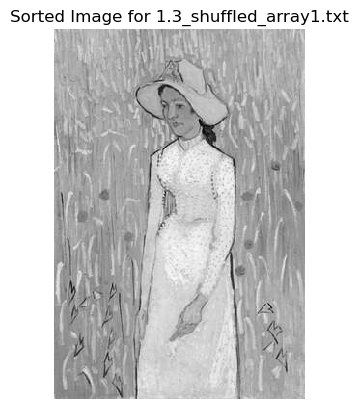

Sorting for 1.3_shuffled_array2.txt and 1.3_shuffled_image2.txt...


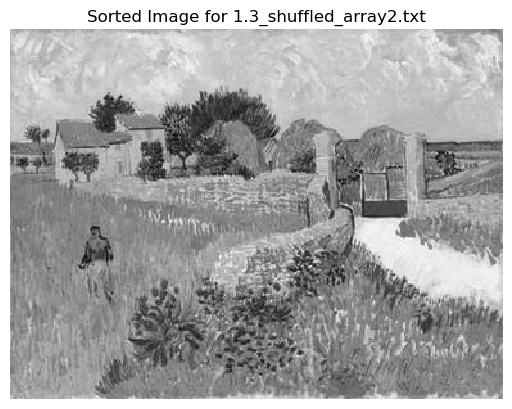

Sorting for 1.3_shuffled_array3.txt and 1.3_shuffled_image3.txt...


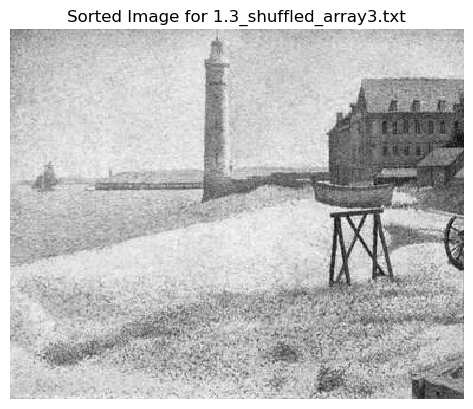

In [21]:
# Task 1.3 - Sorting Arrays and Reordering Corresponding Images

import os
from pathlib import Path
import matplotlib.pyplot as plt

# Helper functions to read files

def read_array_file(file_path):
    """
    Reads and returns a numerical array from a file.
    - The file should contain a single array enclosed in square brackets, e.g., [1, 2, 3].
    """
    with open(file_path, 'r') as f:
        content = f.read().strip()  # Read and clean the file content
        # Remove square brackets and split the numbers
        sanitized_data = content.strip("[]").split(",")
        # Convert the sanitized strings to integers and return
        return [int(num.strip()) for num in sanitized_data if num.strip().isdigit()]

def read_image_file(file_path):
    """
    Reads and returns a 2D numerical array (image) from a file.
    - The file should contain a 2D array enclosed in square brackets, with rows separated by commas.
    """
    with open(file_path, 'r') as f:
        content = f.read().strip()  # Read and clean the file content
        # Remove outer brackets and split the content into rows
        rows = content.strip("[]").split("], [")
        sanitized_image = []
        for row in rows:
            # Remove any remaining brackets and split numbers into a list of integers
            sanitized_row = row.replace("[", "").replace("]", "").split(",")
            sanitized_image.append([int(num.strip()) for num in sanitized_row if num.strip().isdigit()])
        return sanitized_image

# Insertion sort implementation

def insertion_sort_with_image(arr, image):
    """
    Sorts the array `arr` in ascending order and reorders the rows of the `image` (2D array) accordingly.
    - arr: 1D array to sort
    - image: 2D array to reorder based on the sorting of `arr`
    """
    for i in range(1, len(arr)):
        key = arr[i]  # Current element to be inserted
        key_image = image[i]  # Corresponding row in the image
        j = i - 1
        # Move elements of arr[0..i-1] that are greater than key one position ahead
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]  # Shift the array element
            image[j + 1] = image[j]  # Shift the corresponding row in the image
            j -= 1
        arr[j + 1] = key  # Place the key at the correct position
        image[j + 1] = key_image  # Place the key_image row accordingly

# Display the sorted image

def display_image(image, title="Sorted Image"):
    """
    Displays a 2D array (image) as a grayscale image.
    - image: 2D array representing pixel intensities
    - title: Title to display on the image
    """
    plt.imshow(image, cmap='gray', interpolation='nearest')  # Plot the image with grayscale colors
    plt.title(title)  # Add the title
    plt.axis('off')  # Hide axes for a cleaner look
    plt.show()

# Main code for Part 1.3

# Define the base directory containing the files
base_path = Path("/Users/alaasalem/Downloads/UALFINALS/Alaa/part_1.3")

# Define the list of array files and corresponding image files
array_files = ["1.3_shuffled_array1.txt", "1.3_shuffled_array2.txt", "1.3_shuffled_array3.txt"]
image_files = ["1.3_shuffled_image1.txt", "1.3_shuffled_image2.txt", "1.3_shuffled_image3.txt"]

# Process each pair of array and image files
for array_file, image_file in zip(array_files, image_files):
    array_path = base_path / array_file  # Full path to the array file
    image_path = base_path / image_file  # Full path to the image file

    # Read the array and image data from their respective files
    array = read_array_file(array_path)
    image = read_image_file(image_path)

    print(f"Sorting for {array_file} and {image_file}...")

    # Sort the array and reorder the image rows accordingly
    insertion_sort_with_image(array, image)

    # Display the sorted image
    display_image(image, title=f"Sorted Image for {array_file}")


In [ ]:
#Task 1.4 is not done, I want to use my stars for that Task I have 3 Stars.